In [1]:
import collections
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import seaborn as sns
from sklearn import svm
from my_rbm import Rbm
import six.moves.cPickle as pickle
import sys
from pandas import *
from sklearn.preprocessing import OneHotEncoder
from yadlt.models.rbm_models import dbn
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
train_images = mnist.train.images
test_images = mnist.test.images

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
num_hidden = 64
num_epochs=10
rbm = Rbm(num_hidden=num_hidden, num_classes=10, num_features=784, learning_rate=0.01)
rbm.init_rbm()
rbm.fit(mnist.train.images, mnist.test.images, num_epochs=num_epochs)

Number of features: 784
Number of classes: 10
logit shape:  (?, 10)
batch_labels shape:  (?, 10)
epoch: 0
batch_number: 0
batch_number: 1000
batch_number: 2000
batch_number: 3000
batch_number: 4000
batch_number: 5000
rec_loss: 0.160803
epoch: 1
batch_number: 0
batch_number: 1000
batch_number: 2000
batch_number: 3000
batch_number: 4000
batch_number: 5000
rec_loss: 0.149739
epoch: 2
batch_number: 0
batch_number: 1000
batch_number: 2000
batch_number: 3000
batch_number: 4000
batch_number: 5000
rec_loss: 0.144336
epoch: 3
batch_number: 0
batch_number: 1000
batch_number: 2000
batch_number: 3000
batch_number: 4000
batch_number: 5000
rec_loss: 0.141112
epoch: 4
batch_number: 0
batch_number: 1000
batch_number: 2000
batch_number: 3000
batch_number: 4000
batch_number: 5000
rec_loss: 0.138709
epoch: 5
batch_number: 0
batch_number: 1000
batch_number: 2000
batch_number: 3000
batch_number: 4000
batch_number: 5000
rec_loss: 0.136846
epoch: 6
batch_number: 0
batch_number: 1000
batch_number: 2000
batch_

In [79]:
probs_index = dict()
probs = dict()
probs_avg = dict()
probs_min = dict()
probs_max = dict()
probs_std = dict()
x = [i for i in range(num_hidden)]
for i in range(10):
    probs_index[i] = [idx for idx, label in enumerate(mnist.train.labels) if i == mnist.train.labels[idx]]
    probs[i] = [rbm.get_h_prob_out([mnist.train.images[idx]])[0] for idx in probs_index[i]]
    probs_avg[i] = np.average(probs[i], axis=0)
    probs_min[i] = np.min(probs[i], axis=0)
    probs_max[i] = np.max(probs[i], axis=0)
    probs_std[i] = np.std(probs[i], axis=0)

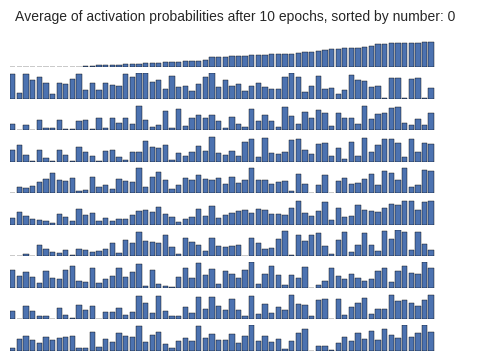

In [30]:
num = 0
sorted_indexes = np.argsort(probs_avg[num])
for i in range(10):
    probs_avg[i] = [probs_avg[i][j] for j in sorted_indexes]
col_num = 10
plt.figure()
plt.suptitle('Average of activation probabilities after %s epochs, sorted by number: %s' % (num_epochs, str(num)))
for cidx in range(col_num):
    plt.subplot(col_num, 1, cidx + 1, axisbg='white')
    plt.bar(x, probs_avg[cidx])
    plt.xticks(())
    plt.yticks(())

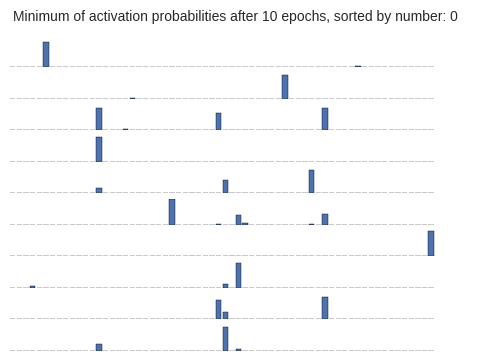

In [31]:
num = 0
sorted_indexes = np.argsort(probs_avg[num])
for i in range(10):
    probs_min[i] = [probs_min[i][j] for j in sorted_indexes]
col_num = 10
plt.figure()
plt.suptitle('Minimum of activation probabilities after %s epochs, sorted by number: %s' % (num_epochs, str(num)))
for cidx in range(col_num):
    plt.subplot(col_num, 1, cidx + 1, axisbg='white')
    plt.bar(x, probs_min[cidx])
    plt.xticks(())
    plt.yticks(())

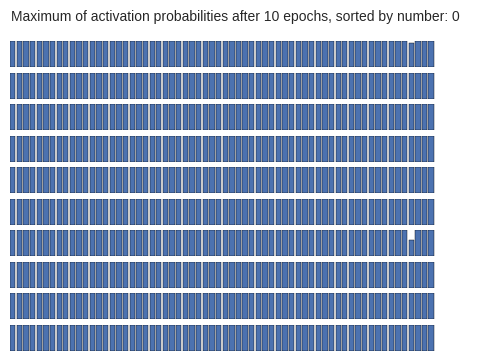

In [32]:
num = 0
sorted_indexes = np.argsort(probs_avg[num])
for i in range(10):
    probs_max[i] = [probs_max[i][j] for j in sorted_indexes]
col_num = 10
plt.figure()
plt.suptitle('Maximum of activation probabilities after %s epochs, sorted by number: %s' % (num_epochs, str(num)))
for cidx in range(col_num):
    plt.subplot(col_num, 1, cidx + 1, axisbg='white')
    plt.bar(x, probs_max[cidx])
    plt.xticks(())
    plt.yticks(())

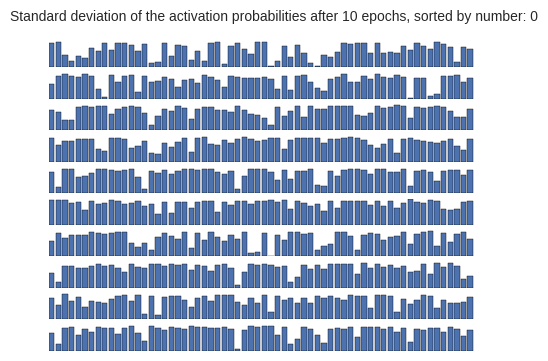

In [111]:
num = 0
sorted_indexes = np.argsort(probs_avg[num])
for i in range(10):
    probs_std[i] = [probs_std[i][j] for j in sorted_indexes]
col_num = 10
plt.figure()
plt.suptitle('Standard deviation of the activation probabilities after %s epochs, sorted by number: %s' % (num_epochs, str(num)))
for cidx in range(col_num):
    plt.subplot(col_num, 1, cidx + 1, axisbg='white')
    plt.bar(x, probs_std[cidx])
    plt.xticks(())
    plt.yticks(())

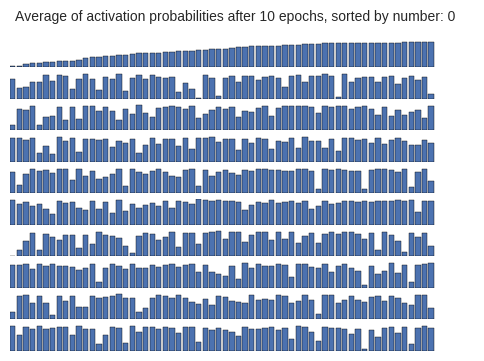

In [110]:
num = 0
sorted_indexes = np.argsort(probs_std[num])
for i in range(10):
    probs_std[i] = [probs_std[i][j] for j in sorted_indexes]
col_num = 10
plt.figure()
plt.suptitle('Average of activation probabilities after %s epochs, sorted by number: %s' % (num_epochs, str(num)))
for cidx in range(col_num):
    plt.subplot(col_num, 1, cidx + 1, axisbg='white')
    plt.bar(x, probs_std[cidx])
    plt.xticks(())
    plt.yticks(())

In [41]:
probs_std_df = DataFrame(probs_std)

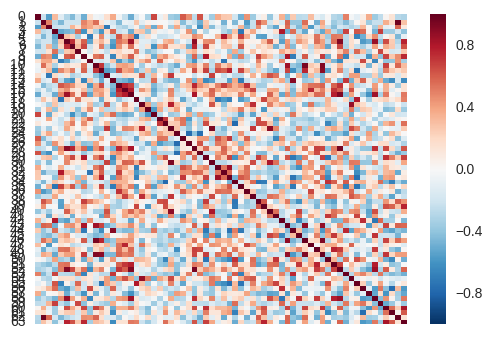

In [42]:
sns.heatmap(probs_std_df.transpose().corr(), xticklabels=False, yticklabels=True)

In [112]:
num = 0
sorted_indexes = np.argsort(probs_std[num])
sorted_zero_probs = np.array(probs[0])[:,sorted_indexes]

In [106]:
sorted_zero_probs.shape

(5444, 64)

In [78]:
probs_std_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.021952e-06,9.870780e-01,1.192071e-11,1.341175e-01,4.549682e-21,0.999999,5.657776e-10,2.846777e-07,8.047195e-22,5.010798e-01,...,6.756461e-08,9.994231e-01,1.378419e-17,9.999770e-01,3.454823e-14,9.999672e-01,2.179784e-12,1.779409e-06,7.988060e-01,1.000000
1,1.000000e+00,1.000000e+00,9.980527e-01,8.983456e-02,1.793834e-07,0.999974,5.559444e-11,1.248095e-01,5.753697e-17,9.997521e-01,...,4.034987e-10,9.999999e-01,5.651632e-24,3.066431e-01,3.468188e-17,9.999593e-01,3.980749e-11,7.838909e-01,4.243384e-17,0.016025
2,9.708478e-06,9.923098e-01,1.161718e-09,9.798852e-05,1.057574e-21,0.999999,3.779723e-07,4.659127e-04,4.607709e-19,9.991634e-01,...,1.900148e-11,1.000000e+00,7.795302e-13,1.000000e+00,8.278665e-15,9.548029e-01,9.304936e-15,2.982033e-06,9.999976e-01,1.000000
3,8.227582e-08,5.950965e-09,1.428391e-15,9.996890e-01,3.485249e-14,0.029861,2.018357e-11,5.183554e-11,1.808444e-25,2.313454e-11,...,1.023974e-03,8.787958e-06,6.330463e-26,3.749080e-01,1.641566e-09,1.000000e+00,3.249068e-10,9.905946e-01,2.970900e-12,1.000000
4,9.999330e-01,1.000000e+00,6.966294e-02,2.678493e-03,2.644970e-08,1.000000,4.949141e-05,6.099035e-05,1.556003e-13,9.999994e-01,...,1.676110e-08,9.999996e-01,3.271447e-11,3.181145e-03,7.942609e-13,2.597088e-01,6.319578e-08,2.089847e-02,3.407834e-03,0.640045
5,9.991748e-01,2.394171e-08,5.586800e-09,9.769082e-01,2.052519e-13,0.999617,4.446306e-04,1.201399e-08,4.380617e-12,8.474043e-13,...,5.598526e-07,2.360338e-11,8.341496e-15,4.235176e-07,1.706484e-08,9.999892e-01,5.849971e-01,1.713555e-08,5.620606e-17,0.996651
6,2.685455e-02,2.731774e-06,4.959186e-16,1.367670e-02,7.944410e-21,0.999984,8.561195e-11,3.376000e-12,2.982447e-20,4.955029e-04,...,4.766821e-08,9.999038e-01,1.643170e-09,1.000000e+00,9.189185e-11,9.999785e-01,7.028335e-10,1.301266e-06,4.597659e-01,1.000000
7,2.167441e-07,8.942975e-02,4.193588e-13,9.977685e-01,7.906502e-20,1.000000,9.098262e-06,1.647725e-11,8.175469e-17,6.390858e-03,...,9.999840e-01,1.728023e-05,6.033769e-05,9.851292e-01,1.005331e-13,1.299980e-03,2.245874e-20,2.119237e-09,9.999998e-01,0.988409
8,2.417483e-03,9.994821e-01,1.385960e-12,9.989691e-01,8.802700e-26,0.999975,6.169133e-13,1.188910e-11,2.711694e-23,1.411204e-09,...,2.899368e-12,1.731552e-01,3.920958e-24,1.000000e+00,2.838252e-18,9.999906e-01,1.461133e-13,1.870899e-03,1.648054e-16,0.999993
9,8.862295e-04,2.220302e-02,8.275414e-01,9.994677e-01,9.993650e-01,0.519846,9.999729e-01,5.332419e-01,3.807702e-09,4.961229e-04,...,6.236552e-06,9.998966e-01,7.341923e-01,7.727008e-01,1.560463e-04,1.743022e-05,5.540459e-09,1.394326e-07,9.036386e-01,1.000000


In [76]:
probs[0]

[array([  1.02195236e-06,   9.87077951e-01,   1.19207057e-11,
          1.34117469e-01,   4.54968199e-21,   9.99998808e-01,
          5.65777647e-10,   2.84677668e-07,   8.04719458e-22,
          5.01079798e-01,   3.60531732e-02,   1.42893086e-14,
          1.76528213e-03,   2.17282642e-02,   2.06837255e-20,
          4.23568624e-13,   1.54671193e-21,   2.05233786e-02,
          1.98851694e-06,   1.00000000e+00,   1.00000000e+00,
          7.64207765e-02,   9.99999881e-01,   9.34309185e-01,
          2.02259701e-03,   1.28969535e-11,   2.92308123e-05,
          5.00939785e-17,   9.99996543e-01,   1.96535530e-14,
          1.47937732e-10,   1.00000000e+00,   1.00000000e+00,
          2.59315960e-15,   1.00000000e+00,   9.99986291e-01,
          2.08755013e-10,   3.02518214e-16,   1.00000000e+00,
          9.89541650e-01,   1.00000000e+00,   4.90002578e-16,
          9.99924660e-01,   3.60326179e-11,   9.99999404e-01,
          1.00000000e+00,   2.37735530e-17,   9.99999762e-01,
        

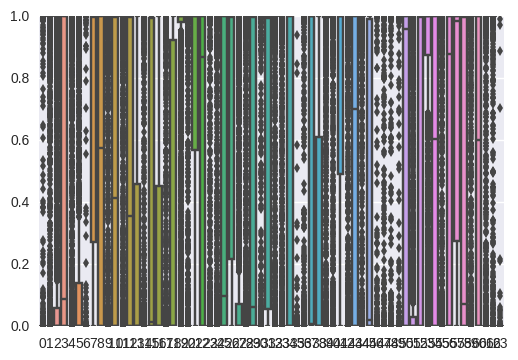

In [113]:
sns.boxplot(data=sorted_zero_probs)

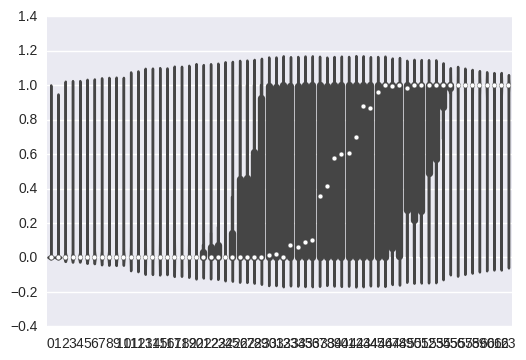

In [109]:
sns.violinplot(data=sorted_zero_probs)

In [99]:
zero_probs = np.array(probs[0])

In [101]:
zero_probs[]

(5444, 64)

In [91]:
zero_probs[0]

array([  1.02195236e-06,   1.00000000e+00,   9.70847759e-06, ...,
         2.75358274e-12,   4.13430114e-13,   2.84496142e-11], dtype=float32)